<h2>LinkedIn Jobs Analysis</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px; background-color: skyblue;">
Author: San Winter
    
Mar 21, 2025

Objectives of this notebook: data wrangling, feature engineering, exploratory data analysis (EDA), model development (specifically, a multilinear regression model), and model evaluation. libraries used: Numpy, seaborn, matplotlib, and scikit-learn.

Dataset source:
This dataset, **LinkedIn Job Postings - Machine Learning Data Set**, was obtained from Kaggle (https://www.kaggle.com/datasets/adampq/linkedin-jobs-machine-learning-data-set?utm_source=chatgpt.com)

In [1]:
pip install numpy pandas matplotlib scikit-learn seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

### LinkedInJobs_MLDataset Data Dictionary/Features

There are 24 columns in the original dataset. 

- Co_Nm: Company Name, dtype Object

- Co_Pg_Lstd: Company Page Listed, dtype Bool

- Emp_Cnt: Company Employee Count, dtype int64

- Flw_Cnt: Company Follower Count, dtype int64

- Job_Ttl: Job Title, dtype Object

- Job_Desc: Job Description, dtype Object

- Is_Supvsr: Is Post a Supervisor Position (Calculated), dType Bool

- max_sal: Maximum Salary, dtype Float64

- med_sal: Median Salary, dtype Float64

- min_sal: Minimum Salary, dtype Float64

- py_prd: Pay Period, dtype Category {Not Listed, YEARLY, HOURLY, MONTHLY, Unpaid, WEEKLY, ONCE}

- py_lstd: Pay Listed (Calculated), dtype Bool 

- wrk_typ: Work Type, dtype Category {Full-time, Contract, Part-time, Temporary, Internship, Other, Volunteer}

- loc: Job Location, dtype Object

- st_code: Job State Code (Calculated), dtype Object

- is_remote: Is Job Remote (Calculated), dtype Bool

- views: Number of Posting Views, dtype int64

- app_typ: Application Type, dtype Category {Offsite Apply, SimpleOnSiteApply, ComplexOnSiteApply}

- app_is_off: Is Application Offsite (Calculated), dtype Bool

- xp_lvl: Experience Level, dtype Category {Mid-Senior level, Not Listed, Entry level, Associate, Director, Internship, Executive}

- domain: Posting Domain, dtype Object

- has_post_domain: Has Posting Domain (Calculated), dtype Bool

- is_sponsored: Is Sponsored, dtype Bool

- base_comp: Has Base Compensation, dtype Bool

In [3]:
df = pd.read_csv("LinkedInJobs_MLDataset.csv")

In [4]:
df.head()

,Co_Nm,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,xp_lvl,domain,has_post_domain,is_sponsored,base_comp
0,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,...,SC,0,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,0,1
1,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,...,WI,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,...,AL,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
3,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,...,CA,0,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1
4,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,...,XF,1,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,0,1


In [5]:
df["domain"].describe()

count                   19688
unique                   2576
top       www.click2apply.net
freq                      533
Name: domain, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Co_Nm            33242 non-null  object 
 1   Co_Pg_Lstd       33246 non-null  bool   
 2   Emp_Cnt          33246 non-null  int64  
 3   Flw_Cnt          33246 non-null  int64  
 4   Job_Ttl          33246 non-null  object 
 5   Job_Desc         33244 non-null  object 
 6   Is_Supvsr        33246 non-null  bool   
 7   max_sal          33246 non-null  float64
 8   med_sal          33246 non-null  float64
 9   min_sal          33246 non-null  float64
 10  py_prd           33246 non-null  object 
 11  py_lstd          33246 non-null  bool   
 12  wrk_typ          33246 non-null  object 
 13  loc              33246 non-null  object 
 14  st_code          33246 non-null  object 
 15  is_remote        33246 non-null  int64  
 16  views            33246 non-null  int64  
 17  app_typ     

In [7]:
df.columns

Index(['Co_Nm', 'Co_Pg_Lstd', 'Emp_Cnt', 'Flw_Cnt', 'Job_Ttl', 'Job_Desc',
       'Is_Supvsr', 'max_sal', 'med_sal', 'min_sal', 'py_prd', 'py_lstd',
       'wrk_typ', 'loc', 'st_code', 'is_remote', 'views', 'app_typ',
       'app_is_off', 'xp_lvl', 'domain', 'has_post_domain', 'is_sponsored',
       'base_comp'],
      dtype='object')

### Visualize 2 of the 8 columns in relation to median salaries before dropping them.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35838 (\N{CJK UNIFIED IDEOGRAPH-8BFE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22530 (\N{CJK UNIFIED IDEOGRAPH-5802}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Framewo

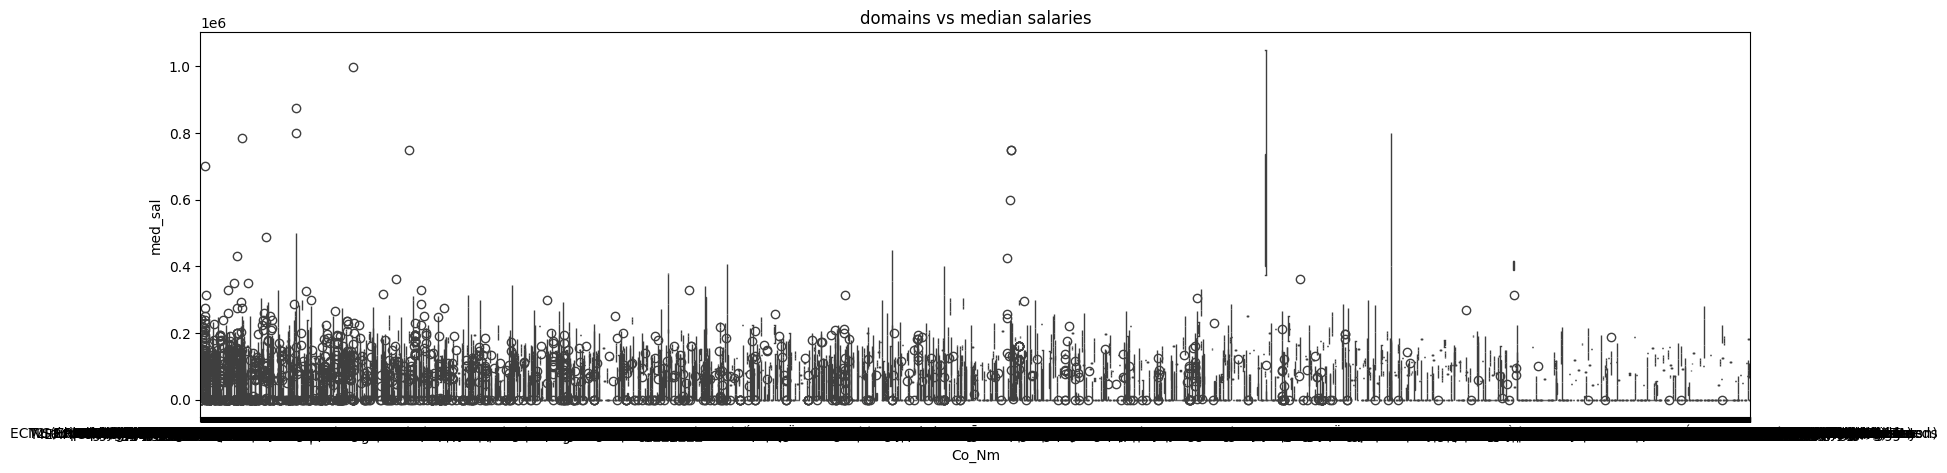

In [8]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df["Co_Nm"], y=df["med_sal"])
# plt.xticks(rotation=45)
plt.title("domains vs median salaries")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 157 (\x9d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 14

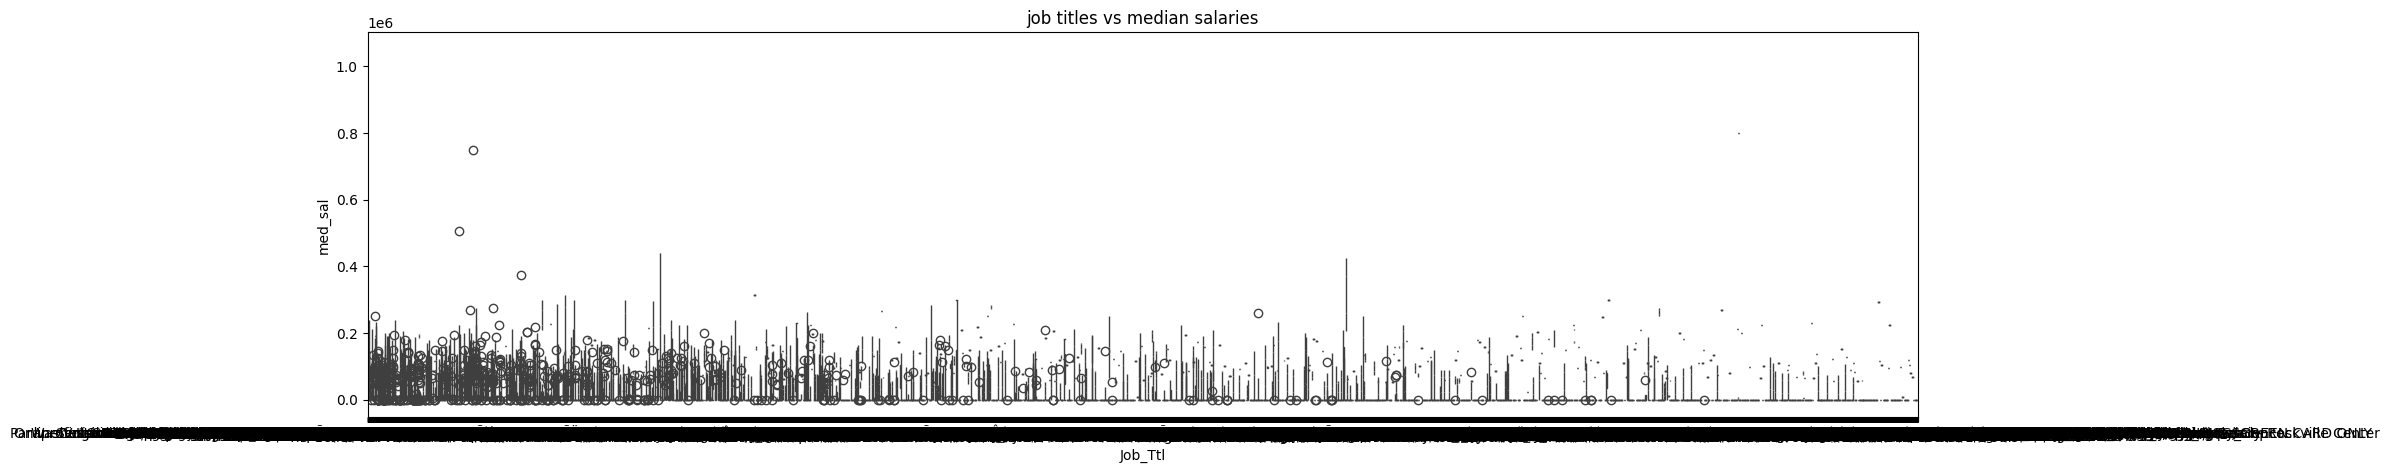

In [9]:
df['Job_Ttl'] = df['Job_Ttl'].str.replace('$', '', regex=False)
plt.figure(figsize=(20,5))
sns.boxplot(x=df["Job_Ttl"], y=df["med_sal"])
plt.title("job titles vs median salaries")
plt.show()

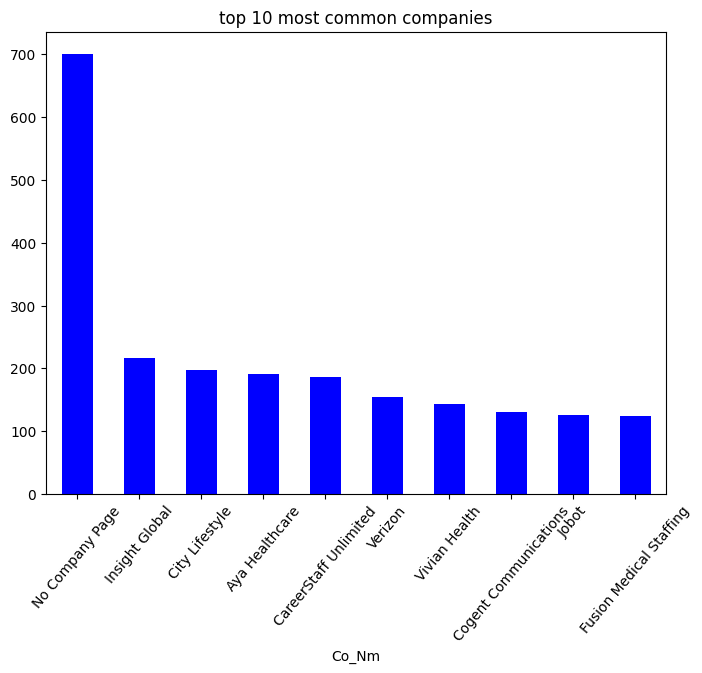

In [10]:
plt.figure(figsize=(8, 6))
df["Co_Nm"].value_counts().nlargest(10).plot(kind="bar", color="blue")
plt.title("top 10 most common companies")
plt.xticks(rotation=50)
plt.show()

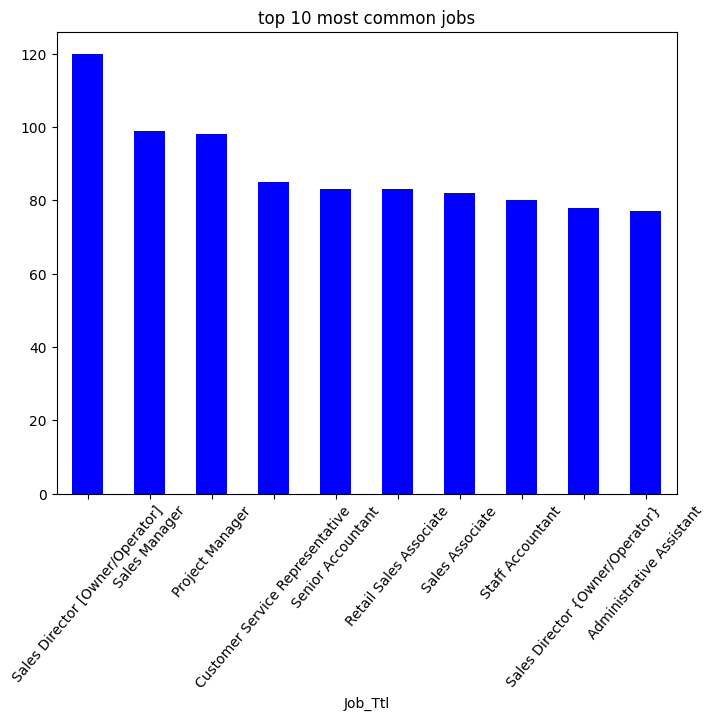

In [11]:
plt.figure(figsize=(8, 6))
df["Job_Ttl"].value_counts().nlargest(10).plot(kind="bar", color="blue")
plt.title("top 10 most common jobs")
plt.xticks(rotation=50)
plt.show()

From the above bar charts you can see the top 10 most common companies and the top 10 most common job title, and Sales Director [Owner/Operator] is the most common job title.

Now, I would like to drop these 8 columns: "Co_Nm", "Job_Ttl", "Job_Desc", "py_prd", "loc", "st_code", "app_typ", "domain" because most of them are categorical variables and each has too many unique values, and I think they are not very much correlated with my target variable, "med_sal".

In [12]:
df = df.drop(["Co_Nm", "Job_Ttl", "Job_Desc", "py_prd", "loc", "st_code", "app_typ", "domain"], axis=1)
df.head()

,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Is_Supvsr,max_sal,med_sal,min_sal,py_lstd,wrk_typ,is_remote,views,app_is_off,xp_lvl,has_post_domain,is_sponsored,base_comp
0,True,1171,11417,False,5250.00,5250.00,5250.00,True,Full-time,0,9,True,Entry level,True,0,1
1,True,300,2923,False,0.00,0.00,0.00,False,Full-time,0,0,True,Not Listed,True,0,0
2,True,314,8487,True,0.00,0.00,0.00,False,Full-time,0,0,True,Not Listed,True,0,0
3,True,36,305,False,22.27,22.27,22.27,True,Full-time,0,1,True,Entry level,True,0,1
4,True,1227,51933,False,275834.00,240895.00,205956.00,True,Full-time,1,0,True,Mid-Senior level,True,0,1


In [13]:
df.describe()

,Emp_Cnt,Flw_Cnt,max_sal,med_sal,min_sal,is_remote,views,is_sponsored,base_comp
count,33246.000000,3.324600e+04,3.324600e+04,3.324600e+04,33246.000000,33246.000000,33246.000000,33246.000000,33246.000000
mean,15484.558744,5.234364e+05,3.186615e+04,2.749495e+04,23123.763015,0.144438,45.424592,0.244150,0.401612
std,62180.953563,2.708736e+06,6.823853e+04,5.790564e+04,48977.379084,0.351539,126.972720,0.429588,0.490232
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.000000,8.135750e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1235.000000,3.799650e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,7.000000,0.000000,0.000000
75%,8160.000000,1.680360e+05,9.796750e+01,9.000000e+01,84.785000,0.000000,38.000000,0.000000,1.000000
max,829111.000000,3.188720e+07,1.300000e+06,1.050000e+06,998426.000000,1.000000,5656.000000,1.000000,1.000000


In [14]:
print(df.isnull().sum())

Co_Pg_Lstd         0
Emp_Cnt            0
Flw_Cnt            0
Is_Supvsr          0
max_sal            0
med_sal            0
min_sal            0
py_lstd            0
wrk_typ            0
is_remote          0
views              0
app_is_off         0
xp_lvl             0
has_post_domain    0
is_sponsored       0
base_comp          0
dtype: int64


There are 4 missing values in "Co_Nm", 2 missing values in "Job_Desc".

In [15]:
df.head()

,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Is_Supvsr,max_sal,med_sal,min_sal,py_lstd,wrk_typ,is_remote,views,app_is_off,xp_lvl,has_post_domain,is_sponsored,base_comp
0,True,1171,11417,False,5250.00,5250.00,5250.00,True,Full-time,0,9,True,Entry level,True,0,1
1,True,300,2923,False,0.00,0.00,0.00,False,Full-time,0,0,True,Not Listed,True,0,0
2,True,314,8487,True,0.00,0.00,0.00,False,Full-time,0,0,True,Not Listed,True,0,0
3,True,36,305,False,22.27,22.27,22.27,True,Full-time,0,1,True,Entry level,True,0,1
4,True,1227,51933,False,275834.00,240895.00,205956.00,True,Full-time,1,0,True,Mid-Senior level,True,0,1


### Visualize the distributions of maximum, median, and minimum salaries.

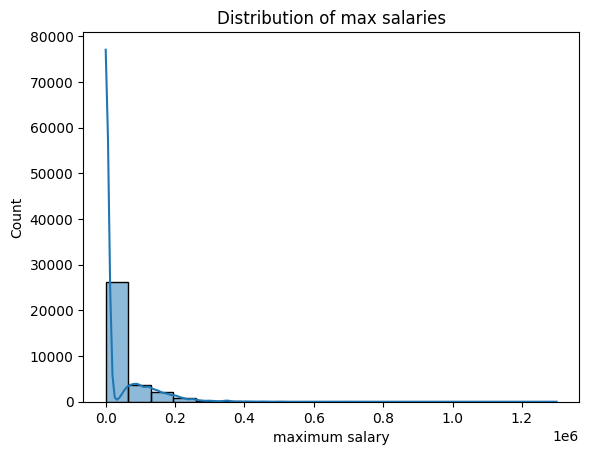

In [16]:
sns.histplot(df["max_sal"], bins=20, kde=True)
plt.title("Distribution of max salaries")
plt.xlabel("maximum salary")
plt.show()

Text(0.5, 1.0, 'Distribution of median salary')

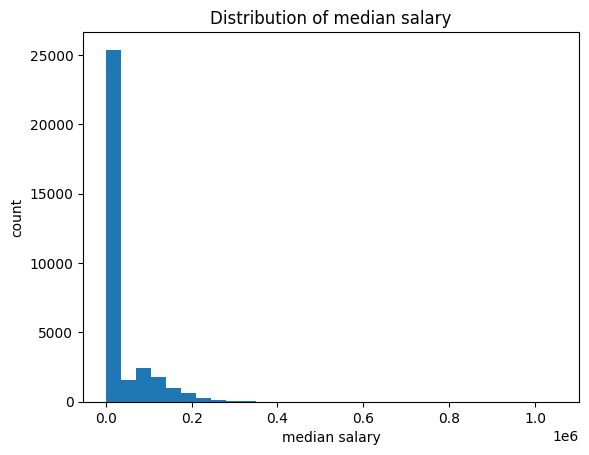

In [17]:
plt.hist(df["med_sal"], bins=30)
plt.xlabel("median salary")
plt.ylabel("count")
plt.title("Distribution of median salary")

Text(0.5, 1.0, 'distribution of minimum salary')

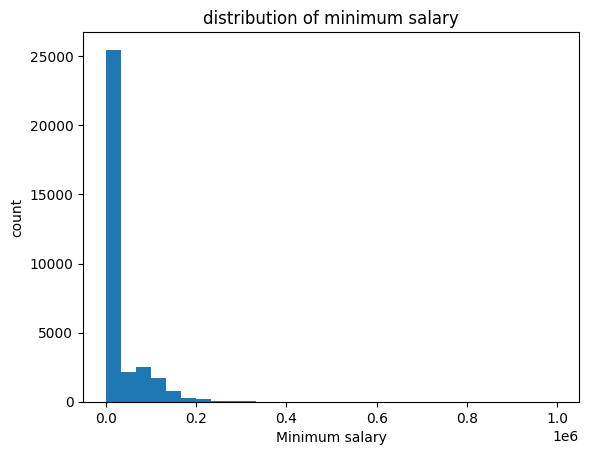

In [18]:
plt.hist(df['min_sal'], bins=30)
plt.xlabel('Minimum salary')
plt.ylabel('count')
plt.title('distribution of minimum salary')

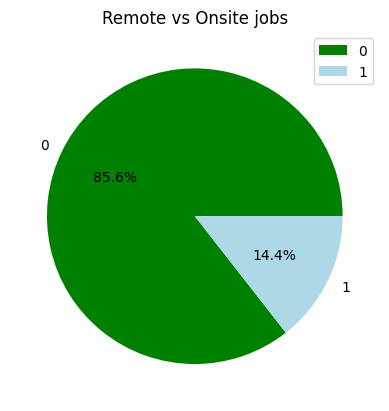

In [19]:
df["is_remote"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["green", "lightblue"])
plt.title("Remote vs Onsite jobs")
plt.legend()
plt.ylabel("")
plt.show()

From the pie chart we can see that 85.6% jobs are on-site, whereas 14.4% are remote.

In [20]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

### Convert the categorical variables: "xp_lvl", "wrk_typ", and "is_remote" into numerical form. 
Since the values are in object format, I will use the get_dummies function to perform one-hot encoding, creating separate columns for each unique value in these three columns, and then integrate the new columns into the original DataFrame and remove the old columns simultaneously.

The following few cells are just to help me get a sense of what's in the three columns, whose values will be converted into numerical values.

In [21]:
df[["wrk_typ", "is_remote", "xp_lvl"]].value_counts()

wrk_typ    is_remote  xp_lvl          
Full-time  0          Mid-Senior level    7541
                      Entry level         6219
                      Not Listed          6154
                      Associate           1988
           1          Mid-Senior level    1505
                                          ... 
Volunteer  0          Executive              1
                      Mid-Senior level       1
Other      0          Associate              1
                      Executive              1
                      Internship             1
Name: count, Length: 75, dtype: int64

In [22]:
print(df[["wrk_typ", "is_remote", "xp_lvl"]].describe(include="all"))

          wrk_typ     is_remote            xp_lvl
count       33246  33246.000000             33246
unique          7           NaN                 7
top     Full-time           NaN  Mid-Senior level
freq        26900           NaN             11258
mean          NaN      0.144438               NaN
std           NaN      0.351539               NaN
min           NaN      0.000000               NaN
25%           NaN      0.000000               NaN
50%           NaN      0.000000               NaN
75%           NaN      0.000000               NaN
max           NaN      1.000000               NaN


In [23]:
print(df[["wrk_typ", "is_remote", "xp_lvl"]].nunique())

wrk_typ      7
is_remote    2
xp_lvl       7
dtype: int64


In [24]:
for col in ["wrk_typ", "is_remote", "xp_lvl"]:
    print(f"unique values in '{col}':")
    print(df[col].unique())
    print("\n")

unique values in 'wrk_typ':
['Full-time' 'Contract' 'Other' 'Part-time' 'Internship' 'Temporary'
 'Volunteer']


unique values in 'is_remote':
[0 1]


unique values in 'xp_lvl':
['Entry level' 'Not Listed' 'Mid-Senior level' 'Associate' 'Director'
 'Executive' 'Internship']




In [25]:
df = pd.get_dummies(df, columns=["wrk_typ", "is_remote", "xp_lvl"], dtype=int)
df.head()

,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Is_Supvsr,max_sal,med_sal,min_sal,py_lstd,views,app_is_off,...,wrk_typ_Volunteer,is_remote_0,is_remote_1,xp_lvl_Associate,xp_lvl_Director,xp_lvl_Entry level,xp_lvl_Executive,xp_lvl_Internship,xp_lvl_Mid-Senior level,xp_lvl_Not Listed
0,True,1171,11417,False,5250.00,5250.00,5250.00,True,9,True,...,0,1,0,0,0,1,0,0,0,0
1,True,300,2923,False,0.00,0.00,0.00,False,0,True,...,0,1,0,0,0,0,0,0,0,1
2,True,314,8487,True,0.00,0.00,0.00,False,0,True,...,0,1,0,0,0,0,0,0,0,1
3,True,36,305,False,22.27,22.27,22.27,True,1,True,...,0,1,0,0,0,1,0,0,0,0
4,True,1227,51933,False,275834.00,240895.00,205956.00,True,0,True,...,0,0,1,0,0,0,0,0,1,0


In [26]:
print(df.columns)

Index(['Co_Pg_Lstd', 'Emp_Cnt', 'Flw_Cnt', 'Is_Supvsr', 'max_sal', 'med_sal',
       'min_sal', 'py_lstd', 'views', 'app_is_off', 'has_post_domain',
       'is_sponsored', 'base_comp', 'wrk_typ_Contract', 'wrk_typ_Full-time',
       'wrk_typ_Internship', 'wrk_typ_Other', 'wrk_typ_Part-time',
       'wrk_typ_Temporary', 'wrk_typ_Volunteer', 'is_remote_0', 'is_remote_1',
       'xp_lvl_Associate', 'xp_lvl_Director', 'xp_lvl_Entry level',
       'xp_lvl_Executive', 'xp_lvl_Internship', 'xp_lvl_Mid-Senior level',
       'xp_lvl_Not Listed'],
      dtype='object')


### Standardize the values of the following columns using StandardScaler:
"Emp_Cnt", "Flw_Cnt", "views"

In [27]:
scaler = StandardScaler()
df[["Emp_Cnt", "Flw_Cnt", "views"]] = scaler.fit_transform(df[["Emp_Cnt", "Flw_Cnt", "views"]])
df.head()

,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Is_Supvsr,max_sal,med_sal,min_sal,py_lstd,views,app_is_off,...,wrk_typ_Volunteer,is_remote_0,is_remote_1,xp_lvl_Associate,xp_lvl_Director,xp_lvl_Entry level,xp_lvl_Executive,xp_lvl_Internship,xp_lvl_Mid-Senior level,xp_lvl_Not Listed
0,True,-0.230195,-0.189028,False,5250.00,5250.00,5250.00,True,-0.286874,True,...,0,1,0,0,0,1,0,0,0,0
1,True,-0.244203,-0.192164,False,0.00,0.00,0.00,False,-0.357756,True,...,0,1,0,0,0,0,0,0,0,1
2,True,-0.243978,-0.190110,True,0.00,0.00,0.00,False,-0.357756,True,...,0,1,0,0,0,0,0,0,0,1
3,True,-0.248449,-0.193130,False,22.27,22.27,22.27,True,-0.349880,True,...,0,1,0,0,0,1,0,0,0,0
4,True,-0.229295,-0.174070,False,275834.00,240895.00,205956.00,True,-0.357756,True,...,0,0,1,0,0,0,0,0,1,0


### At this point, I want to make sure the values in all columns are in numerical form.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Co_Pg_Lstd               33246 non-null  bool   
 1   Emp_Cnt                  33246 non-null  float64
 2   Flw_Cnt                  33246 non-null  float64
 3   Is_Supvsr                33246 non-null  bool   
 4   max_sal                  33246 non-null  float64
 5   med_sal                  33246 non-null  float64
 6   min_sal                  33246 non-null  float64
 7   py_lstd                  33246 non-null  bool   
 8   views                    33246 non-null  float64
 9   app_is_off               33246 non-null  bool   
 10  has_post_domain          33246 non-null  bool   
 11  is_sponsored             33246 non-null  int64  
 12  base_comp                33246 non-null  int64  
 13  wrk_typ_Contract         33246 non-null  int64  
 14  wrk_typ_Full-time     

In [29]:
df[["Co_Pg_Lstd", "Is_Supvsr", "py_lstd", "app_is_off", "has_post_domain"]] = df[["Co_Pg_Lstd", "Is_Supvsr", "py_lstd", "app_is_off", "has_post_domain"]].astype(int)

In [30]:
df = df.round(2)
df.head()

,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Is_Supvsr,max_sal,med_sal,min_sal,py_lstd,views,app_is_off,...,wrk_typ_Volunteer,is_remote_0,is_remote_1,xp_lvl_Associate,xp_lvl_Director,xp_lvl_Entry level,xp_lvl_Executive,xp_lvl_Internship,xp_lvl_Mid-Senior level,xp_lvl_Not Listed
0,1,-0.23,-0.19,0,5250.00,5250.00,5250.00,1,-0.29,1,...,0,1,0,0,0,1,0,0,0,0
1,1,-0.24,-0.19,0,0.00,0.00,0.00,0,-0.36,1,...,0,1,0,0,0,0,0,0,0,1
2,1,-0.24,-0.19,1,0.00,0.00,0.00,0,-0.36,1,...,0,1,0,0,0,0,0,0,0,1
3,1,-0.25,-0.19,0,22.27,22.27,22.27,1,-0.35,1,...,0,1,0,0,0,1,0,0,0,0
4,1,-0.23,-0.17,0,275834.00,240895.00,205956.00,1,-0.36,1,...,0,0,1,0,0,0,0,0,1,0


In [31]:
df.corr()

,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Is_Supvsr,max_sal,med_sal,min_sal,py_lstd,views,app_is_off,...,wrk_typ_Volunteer,is_remote_0,is_remote_1,xp_lvl_Associate,xp_lvl_Director,xp_lvl_Entry level,xp_lvl_Executive,xp_lvl_Internship,xp_lvl_Mid-Senior level,xp_lvl_Not Listed
Co_Pg_Lstd,1.000000,0.036629,0.027958,0.017365,0.019071,0.018361,0.016846,0.020857,0.011557,0.165677,...,-0.000291,0.021291,-0.021291,0.021805,0.020707,0.077501,-0.007896,0.015927,0.083338,-0.187036
Emp_Cnt,0.036629,1.000000,0.819021,0.030521,0.096797,0.083189,0.061845,0.014196,-0.003229,0.152067,...,-0.008698,0.057319,-0.057319,0.004073,-0.011351,-0.032863,-0.016311,0.009163,0.015703,0.018522
Flw_Cnt,0.027958,0.819021,1.000000,0.036278,0.191502,0.178658,0.155639,0.076222,0.036872,0.084621,...,-0.006686,0.033994,-0.033994,-0.007878,0.000539,-0.057523,-0.008218,-0.005531,0.018200,0.043387
Is_Supvsr,0.017365,0.030521,0.036278,1.000000,0.171120,0.176707,0.179424,0.022484,0.053010,-0.030599,...,-0.015640,-0.028645,0.028645,-0.077256,0.309521,-0.236768,0.144306,-0.061910,0.155281,-0.043061
max_sal,0.019071,0.096797,0.191502,0.171120,1.000000,0.991420,0.951032,0.562602,0.110395,-0.035488,...,-0.017192,-0.095596,0.095596,-0.011995,0.136634,-0.150221,0.065646,-0.043074,0.098377,-0.017300
med_sal,0.018361,0.083189,0.178658,0.176707,0.991420,1.000000,0.983276,0.572049,0.114306,-0.045709,...,-0.017481,-0.091964,0.091964,-0.009183,0.146971,-0.152802,0.072296,-0.043901,0.097357,-0.021287
min_sal,0.016846,0.061845,0.155639,0.179424,0.951032,0.983276,1.000000,0.568806,0.116478,-0.058640,...,-0.017382,-0.084265,0.084265,-0.005001,0.157158,-0.152016,0.079487,-0.043794,0.093143,-0.026232
py_lstd,0.020857,0.014196,0.076222,0.022484,0.562602,0.572049,0.568806,1.000000,0.063960,-0.055331,...,0.044353,-0.035366,0.035366,0.047581,0.006708,-0.036672,0.006423,0.036594,0.006924,-0.014948
views,0.011557,-0.003229,0.036872,0.053010,0.110395,0.114306,0.116478,0.063960,1.000000,-0.161035,...,0.001909,-0.343816,0.343816,0.044012,0.048416,-0.109202,0.016589,-0.010179,0.020831,0.032419
app_is_off,0.165677,0.152067,0.084621,-0.030599,-0.035488,-0.045709,-0.058640,-0.055331,-0.161035,1.000000,...,0.008012,0.146621,-0.146621,-0.137045,-0.025140,0.299338,-0.007646,0.069390,0.021091,-0.227017


### Split, train and test the dataset using train_test_split from scikit-learn, and build a multilinear regression model to predict the target variable y, "med_sal".

In [32]:
X = df.drop(["med_sal"], axis=1)
y = df["med_sal"]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(X.shape, y.shape)

(33246, 28) (33246,)


In [35]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
yhat = lm.predict(X)
yhat

array([ 5.25000005e+03,  3.50790786e-08,  1.11567862e-05, ...,
        9.51810000e+04, -1.23043460e-06,  1.19914389e-05], shape=(33246,))

In [37]:
coef = lm.coef_
intercept = lm.intercept_
print("Coefficients: ", coef)
print("Intercept: ", intercept)

Coefficients:  [-3.85769823e-06 -1.07599748e-05  7.46748812e-06  1.11217071e-05
  5.00000000e-01  5.00000000e-01  2.44832908e-04  6.76882494e-07
  1.75896903e-05 -2.45567793e-06  2.09623096e-06 -2.04192213e-04
  7.59790599e-05  6.80250328e-05 -1.87992921e-04  6.06398033e-05
  6.05952446e-05  9.68778846e-05 -1.74124105e-04  1.79813754e-06
 -1.79813754e-06  4.88593807e-07 -7.44949514e-06  6.30850580e-06
 -8.21507437e-06  2.13210918e-05 -6.91336768e-06 -5.54025426e-06]
Intercept:  -7.64440446801018e-05


### Observe the distribution of the predicted and the actual values of y.

/var/folders/d4/s0bwqhcn75b5kh4y6s1q5nsc0000gn/T/ipykernel_69439/146498314.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color='r', label='actual values')
/var/folders/d4/s0bwqhcn75b5kh4y6s1q5nsc0000gn/T/ipykernel_69439/146498314.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

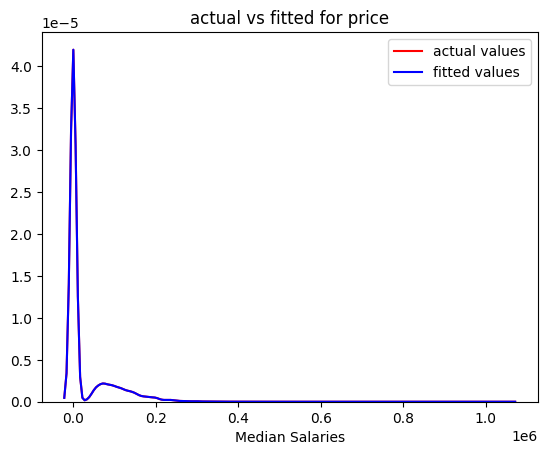

In [38]:
ax1 = sns.distplot(y, hist=False, color='r', label='actual values')
sns.distplot(yhat, hist=False, color='b', label='fitted values', ax=ax1)

plt.title('actual vs fitted for price')
plt.xlabel('Median Salaries')
plt.ylabel('')
plt.legend()
plt.show()

### Model Evaluation

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, yhat)
r2 = r2_score(y, yhat)

print(f"Mean squared error: {mse:.2f}")
print(f"R-squared score: {r2:.2f}")

Mean squared error: 0.00
R-squared score: 1.00


### Thanks for reading. Any questions or feedback are welcome!